In [1]:
## Linear Regression on `adult.csv`

In [2]:
import pandas as pd

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [4]:
### Explore the data

<Axes: >

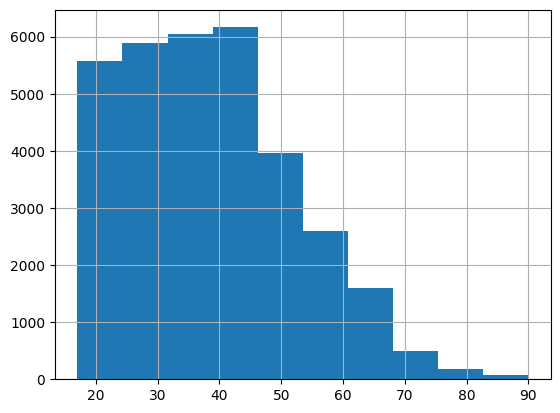

In [5]:
df['age'].hist()

<Axes: xlabel='target'>

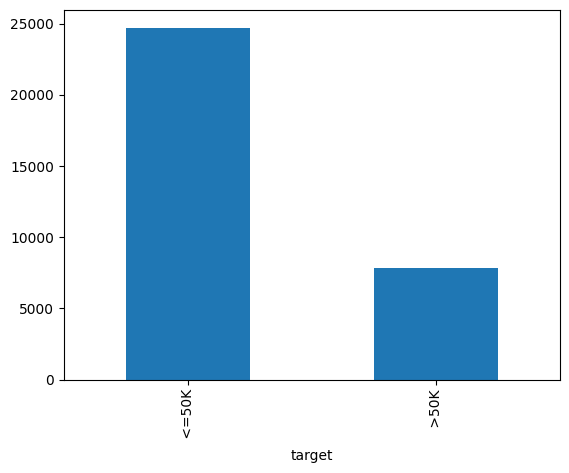

In [6]:
df['target'].value_counts().plot(kind='bar')

<Axes: xlabel='workclass'>

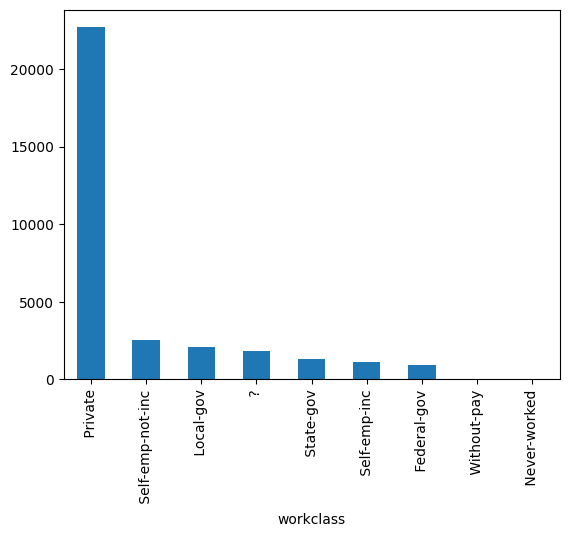

In [7]:
df['workclass'].value_counts().plot(kind='bar')

In [8]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
### Remove the Missing Values

In [10]:
# replace ' ?' with 'Unknown'
df['workclass'] = df['workclass'].replace(' ?', 'Unknown')
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
### Splitting features and target label

In [12]:
x = df.drop('target', axis=1)
y = df['target']

print(f"Shape of x = {x.shape} and y = {y.shape}")

Shape of x = (32561, 14) and y = (32561,)


In [13]:
### Splitting training and testing data - 75 % for training 25 % for testing

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (24420, 14)
x_test: (8141, 14)
y_train: (24420,)
y_test: (8141,)


In [15]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
18716,25,Local-gov,203408,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States
6578,51,Private,125796,11th,7,Separated,Other-service,Not-in-family,Black,Female,0,0,40,Jamaica
601,19,Private,217039,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,28,United-States
2492,26,Private,181666,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States


In [16]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
4013,20,Private,145917,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States
9742,64,Private,265661,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
27779,50,Private,163671,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
13005,44,Private,116825,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,80,United-States
2138,46,Private,27669,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,28,United-States


In [17]:
### Standardize the data

In [18]:
# Column Transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_attributes = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attributes = x_train.select_dtypes(include=['object']).columns

ct = ColumnTransformer([
    ('standar_sclaer', StandardScaler(), numerical_attributes),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
]).fit(x_train)

transformed_x_train = ct.transform(x_train)
transformed_x_test = ct.transform(x_test)

transformed_x_train, transformed_x_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 341880 stored elements and shape (24420, 108)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 113974 stored elements and shape (8141, 108)>)

In [19]:
### Dimensionality Reduction using PCA

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(transformed_x_train)

x_train_pca = pca.transform(transformed_x_train)
x_test_pca = pca.transform(transformed_x_test)

In [21]:
x_train_pca, x_test_pca

(array([[-0.17458034,  0.21496717],
        [-0.57716495, -1.27143308],
        [-1.74362682,  0.96265174],
        ...,
        [ 0.07798842, -0.6803622 ],
        [-0.8433559 , -1.26657603],
        [-0.05739758, -0.28053477]]),
 array([[-2.38677591,  0.86823699],
        [ 0.93891107, -1.69690466],
        [ 0.57858846, -1.28822985],
        ...,
        [-0.57648446, -0.93817307],
        [-0.94329821,  0.13740886],
        [-0.34576418, -0.33159457]]))

In [22]:
### Linear and Logistic Regression

In [25]:
# Combined Code Cell for Linear and Logistic Regression

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, r2_score

# Step 1: Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialize the models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression(max_iter=1000)

# Step 3: Fit the models on the training data
linear_regression.fit(transformed_x_train, y_train_encoded)
logistic_regression.fit(transformed_x_train, y_train_encoded)

# Step 4: Make predictions on the test data
y_test_pred_linear = linear_regression.predict(transformed_x_test)
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)

# Step 5: Evaluate the models
# For linear regression, we compute the R² score (note: this is not typical for classification)
r2 = r2_score(y_test_encoded, y_test_pred_linear)
print("Linear Regression R² Score:", r2)

# For logistic regression, we compute the accuracy score
accuracy = accuracy_score(y_test_encoded, y_test_pred_logistic)
print("Logistic Regression Accuracy:", accuracy)


Linear Regression R² Score: 0.35774656107372826
Logistic Regression Accuracy: 0.8541948163616263


In [28]:
# Combined code cell for Linear Regression with target encoding and metric evaluation

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Encode the target variable (if it's categorical)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialize and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(transformed_x_train, y_train_encoded)

# Step 3: Make predictions on the test set
y_test_pred_linear = linear_regression.predict(transformed_x_test)

# Optionally, if your task is classification and you want discrete predictions, you can round the predictions:
# y_test_pred_linear_discrete = [round(pred) for pred in y_test_pred_linear]

# Step 4: Evaluate the model using regression metrics (using the encoded y_test)
mae = mean_absolute_error(y_test_encoded, y_test_pred_linear)
mse = mean_squared_error(y_test_encoded, y_test_pred_linear)
r2 = r2_score(y_test_encoded, y_test_pred_linear)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.262123989893261
Mean Squared Error (MSE): 0.11469965802817421
R-squared (R²): 0.35774656107372826


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model using encoded true labels
accuracy = accuracy_score(y_test_encoded, y_test_pred_logistic)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_logistic)
class_report = classification_report(y_test_encoded, y_test_pred_logistic)

print("Evaluation using encoded labels:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Evaluation using encoded labels:
Accuracy: 0.8541948163616263
Confusion Matrix:
[[5822  424]
 [ 763 1132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6246
           1       0.73      0.60      0.66      1895

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.85      0.85      0.85      8141



In [ ]:
### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to your training data
naive_bayes.fit(transformed_x_train.toarray(), y_train)

# Make predictions using the fitted model
y_test_pred_naive_bayes = naive_bayes.predict(transformed_x_test.toarray())

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_naive_bayes)
conf_matrix = confusion_matrix(y_test, y_test_pred_naive_bayes)
class_report = classification_report(y_test, y_test_pred_naive_bayes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.5042378086230193
Confusion Matrix:
[[2291 3955]
 [  81 1814]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.97      0.37      0.53      6246
        >50K       0.31      0.96      0.47      1895

    accuracy                           0.50      8141
   macro avg       0.64      0.66      0.50      8141
weighted avg       0.81      0.50      0.52      8141



In [ ]:
### SVM

In [33]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to your transformed training data
svm_classifier.fit(transformed_x_train, y_train)

# Make predictions using the fitted classifier
y_test_pred_svm = svm_classifier.predict(transformed_x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_svm)
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
class_report = classification_report(y_test, y_test_pred_svm)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8581255374032674
Confusion Matrix:
[[5892  354]
 [ 801 1094]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6246
        >50K       0.76      0.58      0.65      1895

    accuracy                           0.86      8141
   macro avg       0.82      0.76      0.78      8141
weighted avg       0.85      0.86      0.85      8141



In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Fit the classifier to your transformed training data
decision_tree.fit(transformed_x_train, y_train)

# Make predictions using the fitted classifier
y_test_pred_dt = decision_tree.predict(transformed_x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_dt)
conf_matrix = confusion_matrix(y_test, y_test_pred_dt)
class_report = classification_report(y_test, y_test_pred_dt)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8177128116938951
Confusion Matrix:
[[5479  767]
 [ 717 1178]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      6246
        >50K       0.61      0.62      0.61      1895

    accuracy                           0.82      8141
   macro avg       0.74      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the kNN classifier with a chosen number of neighbors (e.g., 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to your transformed training data
knn_classifier.fit(transformed_x_train, y_train)

# Make predictions using the fitted classifier
y_test_pred_knn = knn_classifier.predict(transformed_x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_knn)
conf_matrix = confusion_matrix(y_test, y_test_pred_knn)
class_report = classification_report(y_test, y_test_pred_knn)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8352782213487286
Confusion Matrix:
[[5680  566]
 [ 775 1120]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      6246
        >50K       0.66      0.59      0.63      1895

    accuracy                           0.84      8141
   macro avg       0.77      0.75      0.76      8141
weighted avg       0.83      0.84      0.83      8141



In [ ]:
### Comparing the performance of different models

In [37]:
# Combined Code Cell for Multiple Models with Label Encoding

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the target labels (assuming y_train and y_test are strings)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialize the models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression(max_iter=1000)
naive_bayes = GaussianNB()
svm_classifier = SVC()
decision_tree_classifier = DecisionTreeClassifier()  # Fixed spelling: decision_tree_classifier
knn_classifier = KNeighborsClassifier()

# Step 3: Fit the models
linear_regression.fit(transformed_x_train, y_train_encoded)
logistic_regression.fit(transformed_x_train, y_train_encoded)
naive_bayes.fit(transformed_x_train.toarray(), y_train_encoded)  # Convert to dense if needed
svm_classifier.fit(transformed_x_train, y_train_encoded)
decision_tree_classifier.fit(transformed_x_train, y_train_encoded)
knn_classifier.fit(transformed_x_train, y_train_encoded)

# Step 4: Make predictions on the test set
y_test_pred_linear = linear_regression.predict(transformed_x_test)
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)
y_test_pred_naive_bayes = naive_bayes.predict(transformed_x_test.toarray())
y_test_pred_svm = svm_classifier.predict(transformed_x_test)
y_test_pred_decision_tree = decision_tree_classifier.predict(transformed_x_test)
y_test_pred_knn = knn_classifier.predict(transformed_x_test)

# For Linear Regression, threshold predictions (e.g., 0.5) to convert continuous output to binary classes
y_test_pred_linear_binary = (y_test_pred_linear > 0.5).astype(int)

# Step 5: Evaluate the models using accuracy
accuracy_linear = accuracy_score(y_test_encoded, y_test_pred_linear_binary)
accuracy_logistic = accuracy_score(y_test_encoded, y_test_pred_logistic)
accuracy_naive_bayes = accuracy_score(y_test_encoded, y_test_pred_naive_bayes)
accuracy_svm = accuracy_score(y_test_encoded, y_test_pred_svm)
accuracy_decision_tree = accuracy_score(y_test_encoded, y_test_pred_decision_tree)
accuracy_knn = accuracy_score(y_test_encoded, y_test_pred_knn)

# Print the accuracies
print("Accuracy for Linear Regression (after thresholding):", accuracy_linear)
print("Accuracy for Logistic Regression:", accuracy_logistic)
print("Accuracy for Naive Bayes:", accuracy_naive_bayes)
print("Accuracy for SVM:", accuracy_svm)
print("Accuracy for Decision Tree:", accuracy_decision_tree)
print("Accuracy for kNN:", accuracy_knn)


Accuracy for Linear Regression (after thresholding): 0.8412971379437415
Accuracy for Logistic Regression: 0.8541948163616263
Accuracy for Naive Bayes: 0.5042378086230193
Accuracy for SVM: 0.8581255374032674
Accuracy for Decision Tree: 0.8189411620194079
Accuracy for kNN: 0.8352782213487286


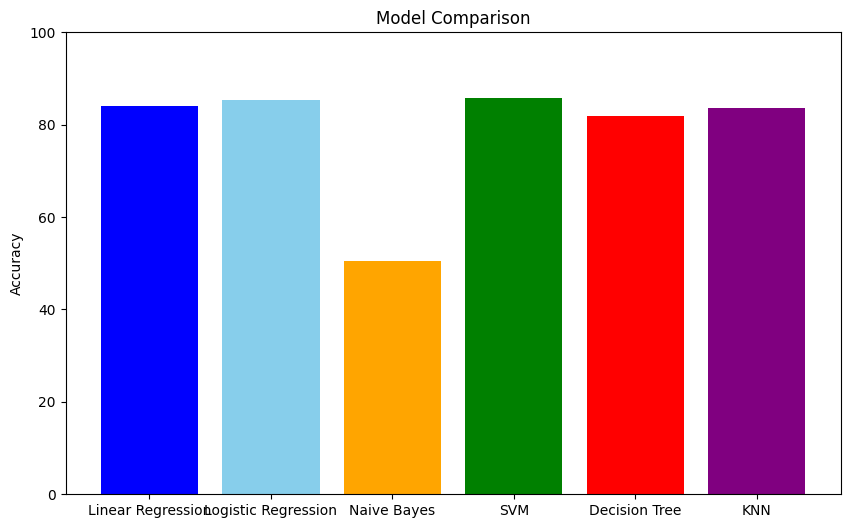

In [38]:
# Plot the accuracies
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'KNN']
accuracies = list(map(lambda x: round(x * 100, 2), [accuracy_linear, accuracy_logistic, accuracy_naive_bayes, accuracy_svm, accuracy_decision_tree, accuracy_knn]))

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'skyblue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.title('Model Comparison')
plt.show()